In [1]:
#!pip install keras

In [7]:
#import important libraries
import pandas as pd
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json
import seaborn as sns
%matplotlib inline


In [8]:
#read the data, put in 1 pandas dataframe, view the type of each feature
df1 = pd.read_csv("data/HRSS_anomalous_optimized.csv") 
df2 = pd.read_csv("data/HRSS_anomalous_standard.csv") 
df3 = pd.read_csv("data/HRSS_normal_optimized.csv") 
df4 = pd.read_csv("data/HRSS_normal_standard.csv") 
df = pd.concat([df1, df2, df3, df4])

df.dtypes

Timestamp          float64
Labels               int64
I_w_BLO_Weg        float64
O_w_BLO_power      float64
O_w_BLO_voltage    float64
I_w_BHL_Weg        float64
O_w_BHL_power      float64
O_w_BHL_voltage    float64
I_w_BHR_Weg        float64
O_w_BHR_power      float64
O_w_BHR_voltage    float64
I_w_BRU_Weg        float64
O_w_BRU_power      float64
O_w_BRU_voltage    float64
I_w_HR_Weg         float64
O_w_HR_power       float64
O_w_HR_voltage     float64
I_w_HL_Weg         float64
O_w_HL_power       float64
O_w_HL_voltage     float64
dtype: object

In [9]:
df.shape
#df_filter = df.drop(f1,axis=1)
#df_filter.shape

(90515, 20)

In [10]:
df.corr()

,Timestamp,Labels,I_w_BLO_Weg,O_w_BLO_power,O_w_BLO_voltage,I_w_BHL_Weg,O_w_BHL_power,O_w_BHL_voltage,I_w_BHR_Weg,O_w_BHR_power,O_w_BHR_voltage,I_w_BRU_Weg,O_w_BRU_power,O_w_BRU_voltage,I_w_HR_Weg,O_w_HR_power,O_w_HR_voltage,I_w_HL_Weg,O_w_HL_power,O_w_HL_voltage
Timestamp,1.000000,0.148326,0.071950,0.019227,0.021015,-0.176214,0.072095,0.006207,-0.204352,0.052301,0.054775,-0.296640,0.008426,-0.026334,0.132752,0.071849,-0.098512,0.135174,-0.111796,-0.100641
Labels,0.148326,1.000000,0.003623,0.004371,0.002234,-0.021347,0.022642,0.013128,-0.026520,0.009519,0.022047,-0.027083,-0.023163,-0.028538,0.004610,0.031531,0.010023,0.001489,0.007612,0.012005
I_w_BLO_Weg,0.071950,0.003623,1.000000,0.722678,0.741214,0.650907,-0.211694,-0.209922,0.458748,-0.325130,-0.367200,0.271469,-0.303477,-0.313562,-0.469420,-0.180849,-0.167469,-0.468789,-0.191189,-0.163542
O_w_BLO_power,0.019227,0.004371,0.722678,1.000000,0.986192,0.698516,-0.030966,-0.050669,0.501809,-0.377757,-0.400487,0.311822,-0.358363,-0.370052,-0.621174,-0.200466,-0.203009,-0.621021,0.063992,-0.191497
O_w_BLO_voltage,0.021015,0.002234,0.741214,0.986192,1.000000,0.710878,-0.013485,-0.030443,0.523312,-0.391450,-0.413079,0.324669,-0.373218,-0.385340,-0.644858,-0.200108,-0.207467,-0.644737,0.073117,-0.195397
I_w_BHL_Weg,-0.176214,-0.021347,0.650907,0.698516,0.710878,1.000000,0.027892,0.054524,0.545625,-0.426754,-0.491019,0.318602,-0.378424,-0.390617,-0.696105,-0.214280,-0.167362,-0.696620,0.234187,-0.150438
O_w_BHL_power,0.072095,0.022642,-0.211694,-0.030966,-0.013485,0.027892,1.000000,0.847897,0.368279,-0.104520,-0.089269,0.333205,-0.380569,-0.392433,-0.339547,-0.146358,-0.042511,-0.340595,0.406777,-0.025384
O_w_BHL_voltage,0.006207,0.013128,-0.209922,-0.050669,-0.030443,0.054524,0.847897,1.000000,0.390088,-0.108649,-0.028151,0.340708,-0.392089,-0.404145,-0.388344,-0.023204,0.067208,-0.389730,0.439746,0.083646
I_w_BHR_Weg,-0.204352,-0.026520,0.458748,0.501809,0.523312,0.545625,0.368279,0.390088,1.000000,-0.159448,-0.185168,0.787163,-0.756998,-0.758776,-0.726407,0.027477,0.161651,-0.727888,0.326745,0.176416
O_w_BHR_power,0.052301,0.009519,-0.325130,-0.377757,-0.391450,-0.426754,-0.104520,-0.108649,-0.159448,1.000000,0.799264,0.124397,-0.018076,0.004450,0.340156,0.435912,-0.035293,0.339646,-0.082174,-0.049369


In [11]:
#show some math calculations of the data
df.describe(include='all')

,Timestamp,Labels,I_w_BLO_Weg,O_w_BLO_power,O_w_BLO_voltage,I_w_BHL_Weg,O_w_BHL_power,O_w_BHL_voltage,I_w_BHR_Weg,O_w_BHR_power,O_w_BHR_voltage,I_w_BRU_Weg,O_w_BRU_power,O_w_BRU_voltage,I_w_HR_Weg,O_w_HR_power,O_w_HR_voltage,I_w_HL_Weg,O_w_HL_power,O_w_HL_voltage
count,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000
mean,6.735101,0.112545,41.508738,5121.192914,13.593748,59.310384,5707.322251,19.800468,22.256530,5392.425259,21.269512,400.285785,5717.807211,14.942383,-410.087297,11445.010277,52.092575,-410.581486,12907.351086,51.958320
std,4.095742,0.316037,182.643934,8738.750775,22.208232,535.782520,9142.519305,30.280685,698.999533,8345.661304,30.783361,320.412718,9340.899010,23.318799,398.147569,6734.000904,75.243996,398.951093,7800.260565,75.052017
min,0.000000,0.000000,-315.835527,-82.014058,-113.020070,-895.200000,-8990.990827,-43.869886,-1322.000000,-241.090909,-0.954545,-855.000000,0.000000,0.000000,-1032.199718,0.000000,0.000000,-1151.203780,0.000000,0.000000
25%,3.229004,0.000000,-106.000000,0.000000,0.000000,-532.000000,0.000000,0.000000,-681.500000,0.000000,0.000000,391.000000,0.000000,0.000000,-833.000000,6908.000000,26.000000,-833.000000,7096.000000,24.000000
50%,6.565994,0.000000,8.000000,0.000000,0.000000,0.000000,40.000000,1.000000,385.000000,2.000000,0.000000,566.000000,0.000000,0.000000,-360.000000,9638.000000,26.000000,-355.000000,11172.000000,26.000000
75%,9.993996,0.000000,26.000000,10584.000000,34.000000,531.000000,12772.000000,51.000000,478.000000,12650.000000,51.000000,573.000000,16422.000000,47.000000,0.000000,14356.000000,29.000000,0.000000,16908.000000,29.000000
max,18.850998,1.000000,1011.098251,34817.661157,179.025123,1301.892229,48719.680782,105.000000,1015.300000,41507.700000,119.600000,755.851233,35008.471074,75.400000,0.000000,42895.834711,543.000000,186.850225,41940.600000,596.400000


In [12]:
blo = df[['I_w_BLO_Weg','O_w_BLO_power','O_w_BLO_voltage','Labels']]
bhl = df[['I_w_BHL_Weg','O_w_BHL_power','O_w_BHL_voltage','Labels']]
bhr = df[['I_w_BHR_Weg','O_w_BHR_power','O_w_BHR_voltage','Labels']]
bru = df[['I_w_BRU_Weg','O_w_BRU_power','O_w_BRU_voltage','Labels']]
hr = df[['I_w_HR_Weg','O_w_HR_power','O_w_HR_voltage' ,'Labels'  ]]
hl = df[['I_w_HL_Weg', 'O_w_HL_power','O_w_HL_voltage','Labels']]


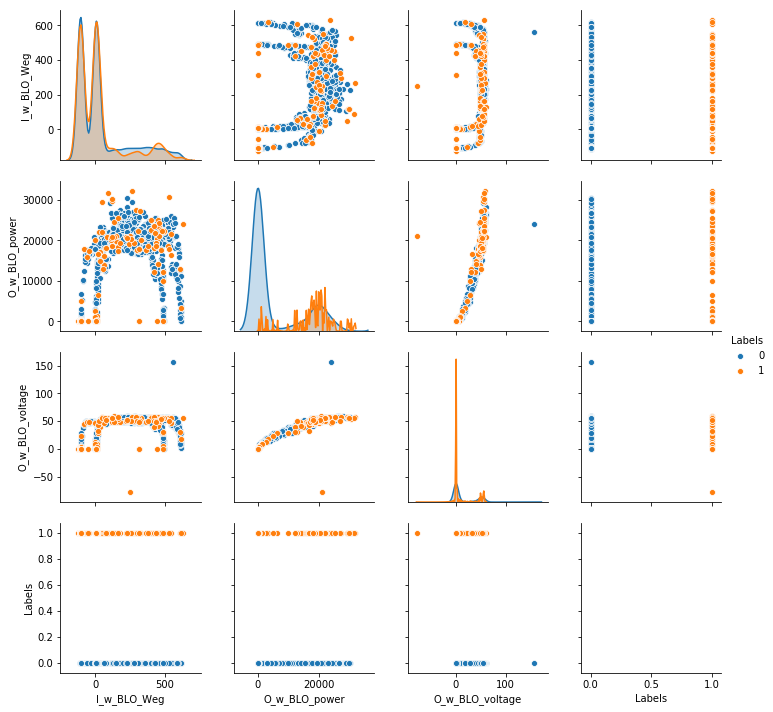

In [14]:
#Visualize each 2 attributes together on a 2d plot, different colors represent different labels

sns_plot= sns.pairplot(blo.sample(3000), hue='Labels')
sns_plot.savefig("blo.png")

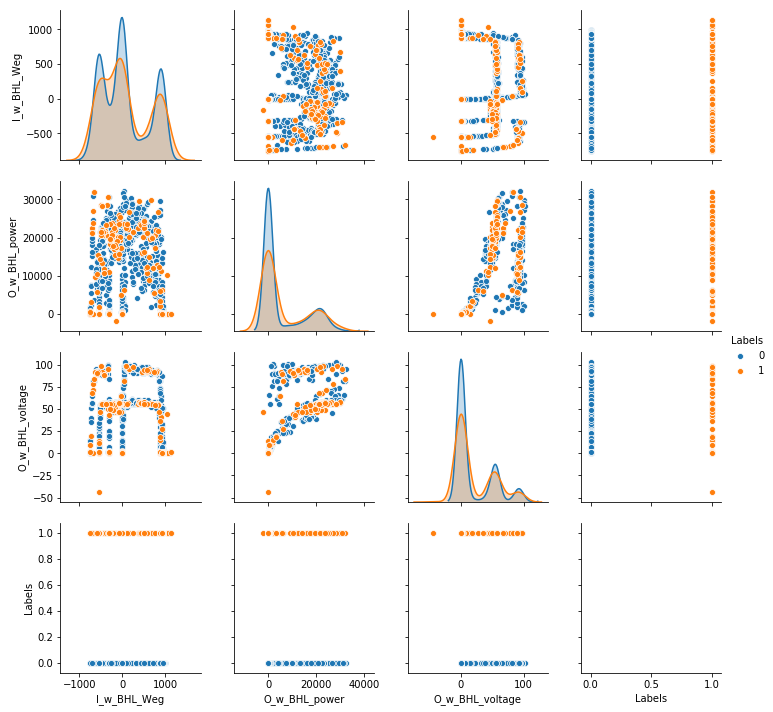

In [15]:
sns_plot= sns.pairplot(bhl.sample(3000), hue='Labels')
sns_plot.savefig("bhl.png")

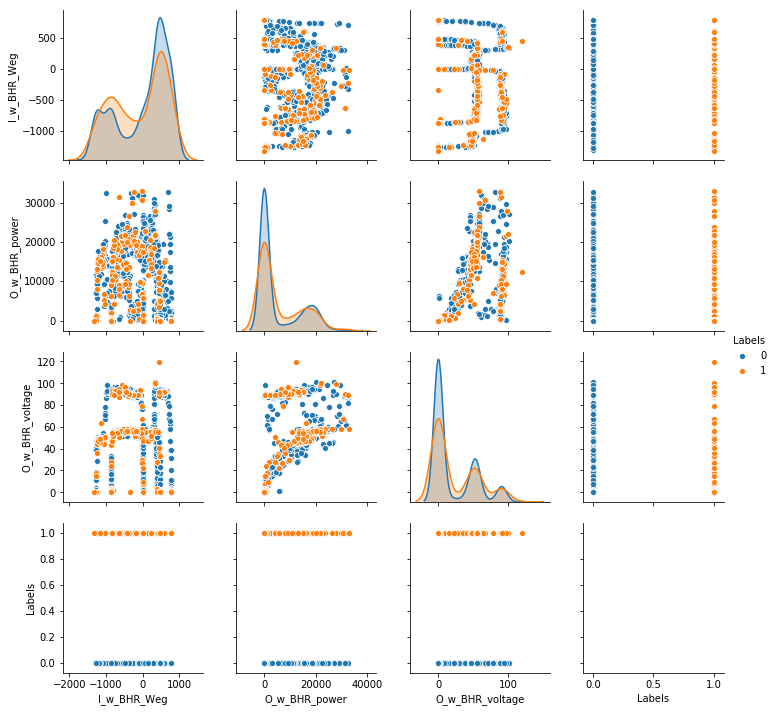

In [16]:
sns_plot=sns.pairplot(bhr.sample(3000), hue='Labels')
sns_plot.savefig("bhr.png")

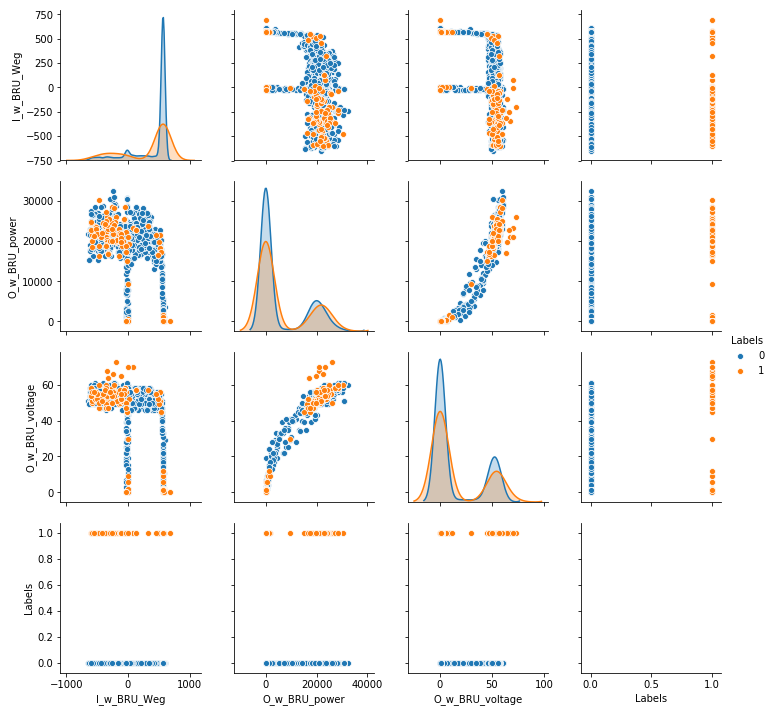

In [17]:
sns_plot=sns.pairplot(bru.sample(3000), hue='Labels')
sns_plot.savefig("bru.png")

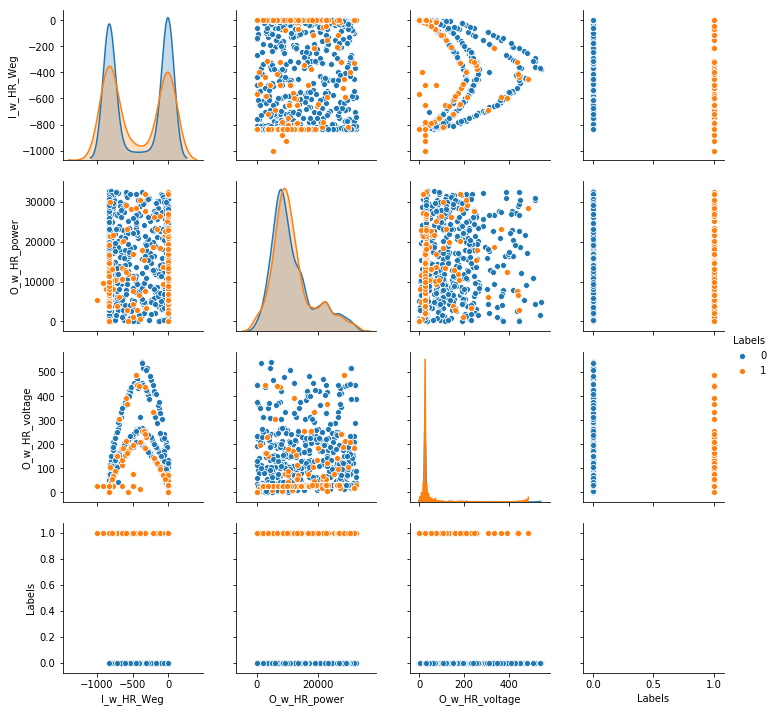

In [18]:
sns_plot=sns.pairplot(hr.sample(3000), hue='Labels')
sns_plot.savefig("hr.png")

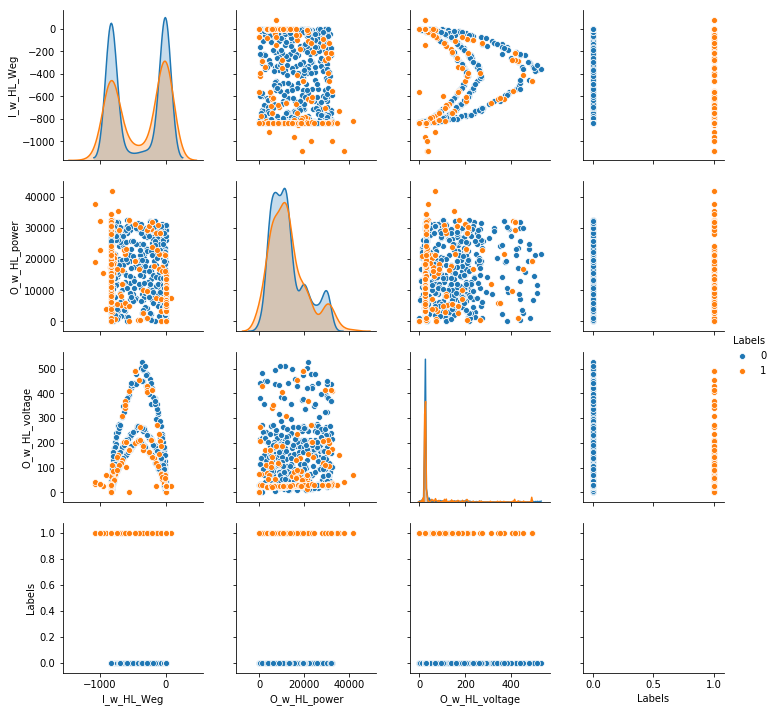

In [19]:
sns_plot=sns.pairplot(hl.sample(3000), hue='Labels')
sns_plot.savefig("hl.png")

In [7]:
#drop the Labels column and put it in a numpy array
labels = np.array(df["Labels"])
df = df.drop("Labels",axis=1)

In [8]:
#Imputing, check for null values 
df.isnull().values.any()

False

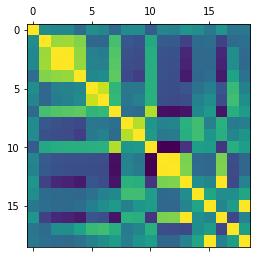

In [9]:
#Correlation visualization
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.show()

In [10]:
#Feature engineering, reduce the number of features to be able to visualize the data on a 3d plot
from sklearn.decomposition import PCA


In [11]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
#Now, the dataframe has been transfomed into a new dataframe with only 3 features
columns = ['pca_%i' % i for i in range(3)]
df_pca = DataFrame(pca.transform(df), columns=columns, index=df.index)
df_pca.head()

,pca_0,pca_1,pca_2
0,-3572.313431,-6161.920862,302.388541
1,-3572.313431,-6161.920861,302.388540
2,-3572.313432,-6161.920861,302.388540
3,-3572.313432,-6161.920860,302.388540
4,-14653.987642,-8401.124373,7436.315689


In [13]:
#concat the labels column
df_pca['Labels'] = labels
df ['Labels'] = labels

In [14]:
df_pca.shape

(90515, 4)

/home/user/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/user/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/user/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2

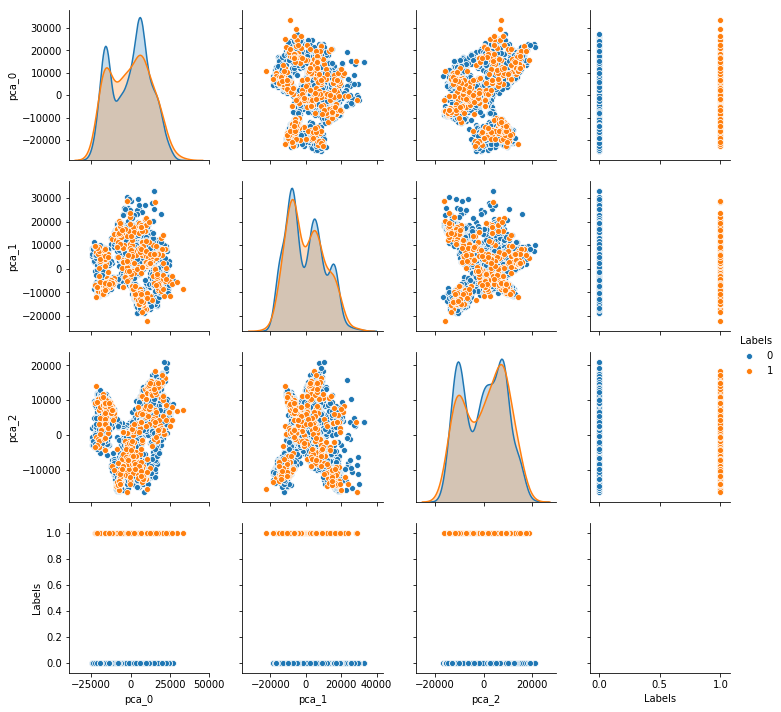

In [15]:
sns.pairplot(df_pca.sample(3000), hue='Labels')

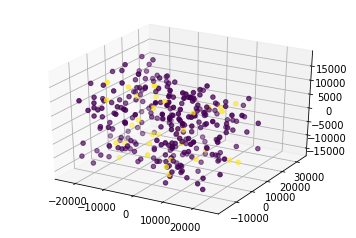

In [16]:
#visualize on a 3d plot
color_label =df_pca.sample(300)['Labels']

ax = plt.axes(projection='3d')
ax.scatter(df_pca.sample(300)['pca_0'], df_pca.sample(300)['pca_1'], df_pca.sample(300)['pca_2'], c=color_label)

In [17]:
#split the data into broken & healthy
data_broken = df.loc[df_pca['Labels']==1]
data_healthy = df.loc[df_pca['Labels']==0]


In [18]:
#take an equal sample of the training and test data
data_healthy = data_healthy.sample(10000)
data_broken = data_broken.sample(10000)

In [ ]:
#create the training data with the healthy and broken data
data_training = pd.concat([data_healthy,data_broken])

#filter the features
f1 = ['O_w_HR_power']
#I_w_BHR_Weg  O_w_HL_power
data_training = data_training.drop(f1,axis=1)

X= data_training.iloc[:,0:18] #19
y= data_training.iloc[:,18] #19


In [110]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.14802384,  2.6462704 ,  1.56737829, ..., -1.04928199,
        -0.30943343, -0.33537259],
       [-0.35266909, -0.01095516,  1.84339479, ..., -1.04928199,
         1.55642257, -0.28428625],
       [-0.2144518 ,  1.21712864,  2.25493493, ..., -1.04928199,
         0.27110819, -0.33537259],
       ...,
       [ 0.02464505, -0.30439111,  1.44303534, ..., -1.04928199,
         0.71044379, -0.33537259],
       [-1.67400336, -0.19027713, -0.58789947, ...,  1.03722918,
        -1.15428055, -0.34814417],
       [-0.63132586,  2.15721048,  0.84797359, ..., -1.04928199,
        -0.58316943, -0.33537259]])

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [112]:
X_train.shape

(14000, 18)

In [113]:
#first benouli Naive bayes classifier will be tested
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)

0.6031666666666666

In [125]:
#now keras sequential neural network will be applied
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(30, activation='relu', kernel_initializer='random_normal', input_dim=18))
#Second  Hidden Layer
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [126]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [107]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=20, epochs=200)


Epoch 1/200
14000/14000 [==============================] - 1s 86us/step - loss: 0.6688 - acc: 0.5921
Epoch 2/200
14000/14000 [==============================] - 1s 60us/step - loss: 0.6547 - acc: 0.6136
Epoch 3/200
14000/14000 [==============================] - 1s 56us/step - loss: 0.6517 - acc: 0.6208
Epoch 4/200
14000/14000 [==============================] - 1s 57us/step - loss: 0.6487 - acc: 0.6269
Epoch 5/200
14000/14000 [==============================] - 1s 57us/step - loss: 0.6438 - acc: 0.6379
Epoch 6/200
14000/14000 [==============================] - 1s 56us/step - loss: 0.6387 - acc: 0.6420
Epoch 7/200
14000/14000 [==============================] - 1s 56us/step - loss: 0.6335 - acc: 0.6465
Epoch 8/200
14000/14000 [==============================] - 1s 57us/step - loss: 0.6268 - acc: 0.6459
Epoch 9/200
14000/14000 [==============================] - 1s 57us/step - loss: 0.6199 - acc: 0.6510
Epoch 10/200
14000/14000 [==============================] - 1s 57us/step - loss: 0.6089 - a

14000/14000 [==============================] - 1s 56us/step - loss: 0.3447 - acc: 0.8470
Epoch 161/200
14000/14000 [==============================] - 1s 56us/step - loss: 0.3466 - acc: 0.8471
Epoch 162/200
14000/14000 [==============================] - 1s 57us/step - loss: 0.3467 - acc: 0.8464
Epoch 163/200
14000/14000 [==============================] - 1s 57us/step - loss: 0.3439 - acc: 0.8474
Epoch 164/200
14000/14000 [==============================] - 1s 55us/step - loss: 0.3473 - acc: 0.8471
Epoch 165/200
14000/14000 [==============================] - 1s 57us/step - loss: 0.3444 - acc: 0.8496
Epoch 166/200
14000/14000 [==============================] - 1s 57us/step - loss: 0.3444 - acc: 0.8475
Epoch 167/200
14000/14000 [==============================] - 1s 57us/step - loss: 0.3430 - acc: 0.8496
Epoch 168/200
14000/14000 [==============================] - 1s 57us/step - loss: 0.3438 - acc: 0.8489
Epoch 169/200
14000/14000 [==============================] - 1s 58us/step - loss: 0.343

In [128]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

14000/14000 [==============================] - 0s 20us/step


[0.3151545386314392, 0.871]

In [123]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2801  179]
 [ 881 2139]]


Train on 10500 samples, validate on 3500 samples
Epoch 1/200
10500/10500 [==============================] - 1s 134us/step - loss: 0.6671 - acc: 0.5930 - val_loss: 0.6544 - val_acc: 0.6137
Epoch 2/200
10500/10500 [==============================] - 1s 84us/step - loss: 0.6512 - acc: 0.6224 - val_loss: 0.6502 - val_acc: 0.6160
Epoch 3/200
10500/10500 [==============================] - 1s 86us/step - loss: 0.6471 - acc: 0.6268 - val_loss: 0.6467 - val_acc: 0.6257
Epoch 4/200
10500/10500 [==============================] - 1s 86us/step - loss: 0.6426 - acc: 0.6333 - val_loss: 0.6461 - val_acc: 0.6211
Epoch 5/200
10500/10500 [==============================] - 1s 86us/step - loss: 0.6383 - acc: 0.6370 - val_loss: 0.6414 - val_acc: 0.6311
Epoch 6/200
10500/10500 [==============================] - 1s 88us/step - loss: 0.6347 - acc: 0.6326 - val_loss: 0.6353 - val_acc: 0.6343
Epoch 7/200
10500/10500 [==============================] - 1s 86us/step - loss: 0.6296 - acc: 0.6425 - val_loss: 0.6308 - 

Epoch 118/200
10500/10500 [==============================] - 1s 86us/step - loss: 0.3316 - acc: 0.8574 - val_loss: 0.3664 - val_acc: 0.8417
Epoch 119/200
10500/10500 [==============================] - 1s 84us/step - loss: 0.3313 - acc: 0.8541 - val_loss: 0.3639 - val_acc: 0.8414
Epoch 120/200
10500/10500 [==============================] - 1s 84us/step - loss: 0.3322 - acc: 0.8554 - val_loss: 0.3740 - val_acc: 0.8383
Epoch 121/200
10500/10500 [==============================] - 1s 83us/step - loss: 0.3314 - acc: 0.8566 - val_loss: 0.3791 - val_acc: 0.8403
Epoch 122/200
10500/10500 [==============================] - 1s 84us/step - loss: 0.3318 - acc: 0.8540 - val_loss: 0.3742 - val_acc: 0.8374
Epoch 123/200
10500/10500 [==============================] - 1s 88us/step - loss: 0.3322 - acc: 0.8540 - val_loss: 0.3571 - val_acc: 0.8500
Epoch 124/200
10500/10500 [==============================] - 1s 85us/step - loss: 0.3322 - acc: 0.8584 - val_loss: 0.3659 - val_acc: 0.8434
Epoch 125/200
10500/

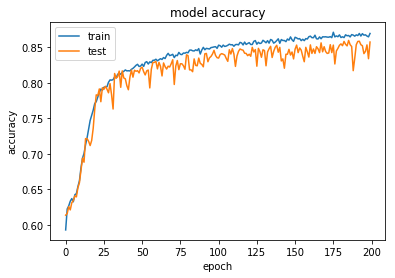

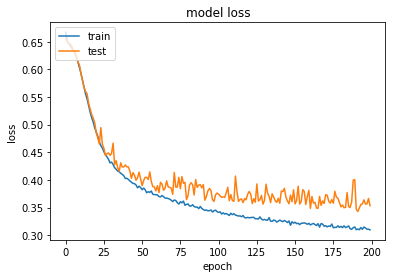

In [127]:
history = classifier.fit(X_train, y_train, validation_split=0.25, epochs=200, batch_size=16, verbose=1)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()